In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt

plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject
from modelproject import ASAD

# Description and the solution in terms of equation

Aggregated Demand and Aggregated Supply for a closed economy with stocastic and persistent shocks.

1. **Generel marked eq:** $$y_{t}-\overline{y}=\alpha_{1}\left(g_{t}-\overline{g}\right)-\alpha_{2}\left(r_{t}-\overline{r}\right)-\alpha_{3}(\tau_{t}-\overline{\tau})+v_{t}$$
2. **Taylor-Rule:** $$i_{t}=\overline{r}+\pi_{t+1}^{e}+h\left(\pi_{t}-\pi^{*}\right)+b\left(y_{t}-\overline{y}\right)+\hat{\rho}_{t}$$
3. **AS Curve:** $$ \pi_{t}=\pi_{t}^{e}+\gamma(y_{t}-\overline{y})+s_{t} $$
4. **Static inflation expectations:** $$ \pi^e_t = \pi_{t-1}$$
Firstly we will define the AD curve as a combination of equation 1), 2) 3) & 5):
$$y_{t}-\overline{y}=-\alpha\left(\pi_{t}-\pi^{*}\right)+z_{t} $$
$$ \alpha=\frac{\alpha_{2}h}{1+\alpha_{2}b},z_{t}=\frac{\alpha_{1}(g_{t}-\overline{g})-\alpha_{2}\hat{\rho}-\alpha_{3}(\tau_{t}-\overline{\tau})+v_{t}}{1+\alpha_{2}b} $$
$$ \pi_{t}=\pi_{t-1}+\gamma(y_{t}-\overline{y})+s_{t} 


To illustrate these solutions we will define the gaps as:
1. **Output:** $\hat{y}_{t} = y_t-\bar{y}$
2. **Inflation:** $\hat{\pi}_{t} = \pi_t-\pi^{\ast}$

We can then rewrite in terms of gap variables:
$$\hat{\pi}=-\frac{1}{\alpha}\left(\hat{y}-z\right)$$

$$\hat{\pi}=\hat{\pi}_{-1}+\gamma\hat{y}+s$$

In a given periode t when the model in not in its long rong equlibrium the AD and AS equations is given by:
$$\hat{y}=\frac{z-\alpha\hat{\pi}_{-1}-\alpha s}{1+\alpha\gamma}$$
$$\hat{\pi}=\frac{\hat{\pi}_{-1}+\gamma z+s}{1+\alpha\gamma}$$

Then we can rewrite the output gap equation a under the assumption that the economy in period 0 is its long run equalibrium with $s = 0$ & $z = 0$:
$$\hat{y}=\frac{z-\alpha s}{1+\alpha\gamma}$$

$$\hat{\pi}=\frac{\gamma z+s}{1+\alpha\gamma}$$

Using the estimated parameters of Hans Jørgen Whitta-Jacobsen and Peter Birch Sørensen in their book "Introduction to Advanced Macroeconomics," we have that $\alpha = 0.7$ and $\gamma = 0.075$. We will initially simulate the model with a positive demand shock that appears in period $t = 1$ and then fades. Then we will plot the AS and AD curves as the economy works its way back to the long-run equilibrium.

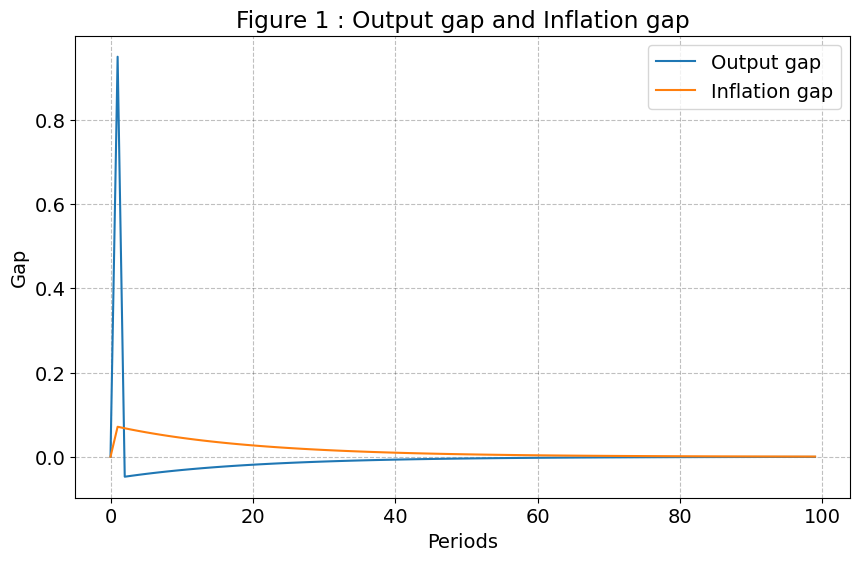

In [8]:
# Instantiate the ASAD model with parameters
model = ASAD(T=100, z=1, s=0)

# Solve the model
model.solve_model()

# Plot the output gap and inflation gap
model.plot_results()


As we can see, the model converges back to its original equilibrium after the initial demand shock, and the model as stabel. 

# AS/AD curves and implementation of flexiable demand and supply shock
To actually express this in terms of AS and AD curves and not just the short-term equilibriums converging back to the long-run equilibrium, we will thus have to create the corresponding curves for the given points. Here we will use the following curves:
$$\hat{\pi}=-\frac{1}{\alpha}\left(\hat{y}-z\right)$$

$$\hat{\pi}=\hat{\pi}_{-1}+\gamma\hat{y}+s$$
Then we will use the ASAD class and the plot_ad_as function to plot a 1-period positive demand shock and the convergence back towards the long-run equilibrium.

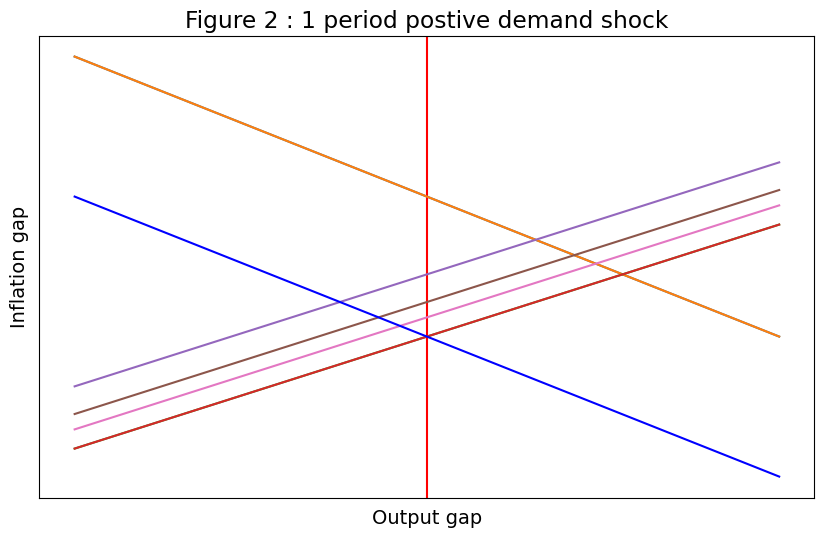

In [7]:
asad_model = ASAD(T=5, z=0.01, s=0, gamma=1, alpha=0.8, z_duration=1, s_duration=0)
asad_model.solve_model()
asad_model.plot_ad_as()

In period 0, the economy is in its long-run equilibrium $(\overline{y}, \overline{\pi})$.

In period 1, as the demand shock hits, the AD curve shifts to the right as aggregate demand increases. The economy is now in a boom with a positive output and inflation gap.

In period 2, the AD curve shifts back to the LRAD curve, and now because of the static inflation expectations (equation 4), the AS curve shifts to the left. This happens because the households' increased inflation expectations result in a higher wage requirement, thus increasing marginal costs for the producers. The economy then enters a recession with a negative output gap and a positive inflation gap (though lower than $\pi_{1}$).

In period 3, the households will lower their inflation expectations, resulting in lower marginal costs for the producers and lower inflation. Meanwhile, the Central Bank will battle the unwanted positive inflation gap and lower the nominal interest rate (more than 1:1 according to the Taylor-rule), which will increase aggregate demand and thus create a shift along the AD curve.

From period 4 to equilibrium, this effect will continue until the economy is once again in its long-run equilibrium.

# Analysis of a permanent shock to the model
We will now shift the attenton towards how permenant shocks effect the long run equilibirum.

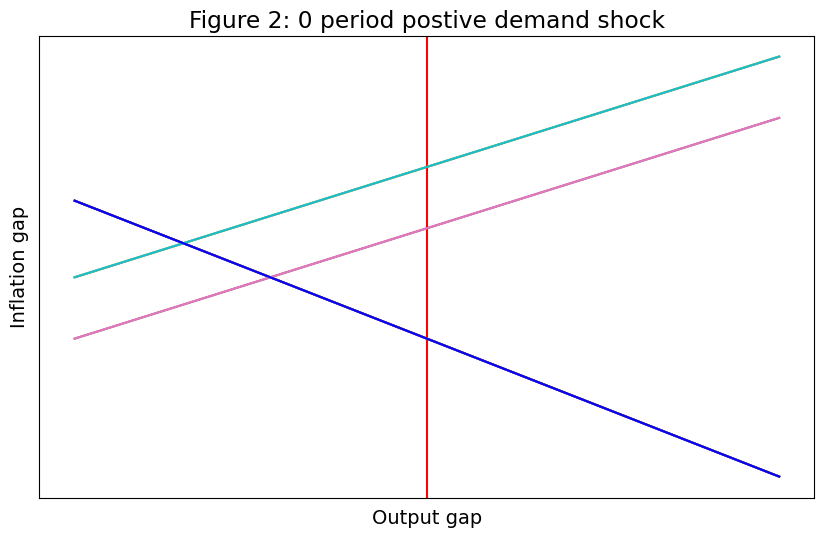

In [23]:
asad_model = ASAD(T=5, z=0.00, s=0.01, gamma=1, alpha=0.8, z_duration=0, s_duration=5)
asad_model.solve_model()
asad_model.plot_ad_as()

# Further analysis: Interactive plot of type and length of the shocks.
To make a more flexible implementation of different shocks affecting the convergence and the shifting of the curves, we will implement an interactive plot that allows users to choose the type of shock that hits the model and the duration for which the shock appears. This interactive tool will enable users to explore the dynamics of various shocks and their impact on the economy, providing valuable insights into the adjustment process and the path back to the long-run equilibrium.